In [14]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('../data/raw/hurdat2_cleaned.csv', parse_dates=['observation_datetime'])
tmp = df[['code','observation_datetime','lat','lon']]
tmp = tmp.sort_values(by=['code', 'observation_datetime'], ascending=[True, True])
df_earliest = tmp.drop_duplicates(subset=['code'], keep='first')
df_earliest.columns = ['code','formation_datetime','formation_lat','formation_lon']
df_earliest.reset_index(inplace=True, drop=True)
df_earliest.head()

,code,formation_datetime,formation_lat,formation_lon
0,AL011851,1851-06-25 00:00:00,28.0,265.2
1,AL011852,1852-08-19 00:00:00,20.5,292.9
2,AL011853,1853-08-05 12:00:00,32.5,291.0
3,AL011854,1854-06-25 00:00:00,26.0,267.5
4,AL011855,1855-08-06 12:00:00,22.2,262.0


In [87]:
df_earliest.to_csv('../data/processed/formation.csv', index=False)

In [17]:
landfalls = df[df.record_identifier == 'L']

In [18]:
landfalls.code.value_counts()

code
AL051960    9
AL092011    9
AL091966    9
AL062008    8
AL051964    7
           ..
AL071935    1
AL011936    1
AL031936    1
AL041936    1
AL031957    1
Name: count, Length: 727, dtype: int64

In [60]:
donna = df[df.code == 'AL051960']

In [55]:
url = "https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip"
coastlines = gpd.read_file(url)

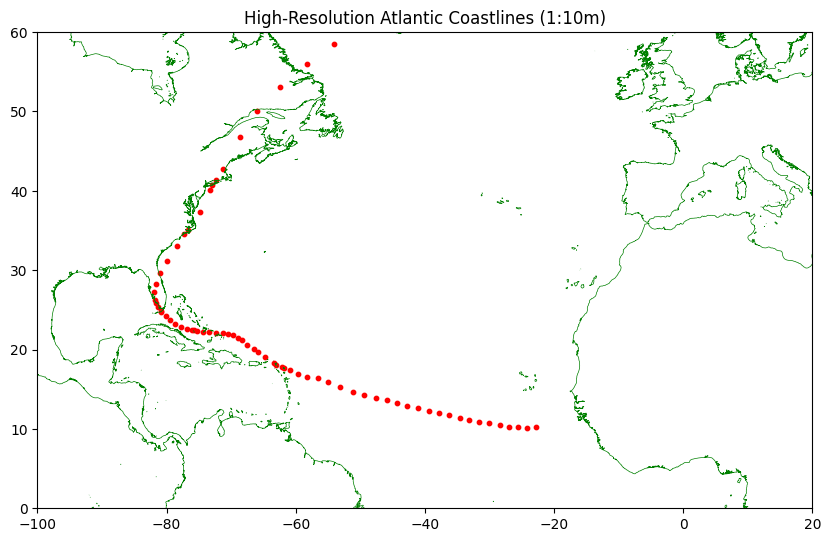

In [ ]:
gdf = gpd.GeoDataFrame(
    donna,
    geometry=gpd.points_from_xy(donna.lon.apply(lambda x: x - 360 if x > 180 else x), donna.lat),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(10, 10))
coastlines.plot(ax=ax, linewidth=0.5, color='green')

gdf.plot(
	ax=ax,
	# column='record_identifier',
	markersize=10,
	marker='o',
	color='r',
	label='Observations'
)

# ax.set_xlim(-85, -80)
# ax.set_ylim(20,27)

ax.set_xlim(-100, 20)  
ax.set_ylim(0, 60) 

plt.title("High-Resolution Atlantic Coastlines (1:10m)")
plt.show()

In [62]:
df.head()

,code,name,record_identifier,status,max_sus_wind_kt,min_pressure_mb,r_34kt_ne,r_34kt_se,r_34kt_sw,r_34kt_nw,...,r_50kt_nw,r_64kt_ne,r_64kt_se,r_64kt_sw,r_64kt_nw,r_max_sus,observation_datetime,formation_datetime,lat,lon
0,AL011851,UNNAMED,NaN,HU,80.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 00:00:00,1851-06-25 00:00:00,28.0,265.2
1,AL011851,UNNAMED,NaN,HU,80.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 06:00:00,1851-06-25 00:00:00,28.0,264.6
2,AL011851,UNNAMED,NaN,HU,80.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 12:00:00,1851-06-25 00:00:00,28.0,264.0
3,AL011851,UNNAMED,NaN,HU,80.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 18:00:00,1851-06-25 00:00:00,28.1,263.5
4,AL011851,UNNAMED,L,HU,80.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 21:00:00,1851-06-25 00:00:00,28.2,263.2


In [63]:
df2 = pd.read_csv('../data/processed/design-matrix.csv')
df2.head()

,code,name,formation_datetime,formation_lat,formation_lon,ACE,rhum_minus_0_days,rhum_minus_3_days,rhum_minus_7_days,rhum_minus_14_days,sst_minus_0_days,sst_minus_3_days,sst_minus_7_days,sst_minus_14_days,vws_minus_0_days,vws_minus_3_days,vws_minus_7_days,vws_minus_14_days
0,AL011851,UNNAMED,1851-06-25 00:00:00,28.0,265.2,5.55,58.062843,58.062843,58.062843,58.062843,27.493002,27.493002,27.493002,27.493002,35.908143,35.908143,35.908143,35.908143
1,AL021851,UNNAMED,1851-07-05 12:00:00,22.2,262.4,0.64,74.068085,78.490578,55.125404,37.810688,28.438002,28.438002,27.738001,27.738001,29.998210,29.998210,29.998210,29.998210
2,AL031851,UNNAMED,1851-07-10 12:00:00,12.0,300.0,0.25,65.337807,44.401619,43.306999,32.944099,27.893002,27.893002,27.893002,27.575001,38.835399,38.835399,38.835399,38.835399
3,AL041851,UNNAMED,1851-08-16 00:00:00,13.4,312.0,22.83,68.846222,48.393429,51.262020,58.588402,27.195002,27.195002,27.195002,27.195002,39.611651,39.611651,39.611651,39.611651
4,AL051851,UNNAMED,1851-09-13 00:00:00,32.5,286.5,4.00,40.366375,42.911156,71.011948,44.569759,26.835001,26.835001,26.835001,27.370001,39.997490,39.997490,39.997490,39.997490


In [64]:
df2 = df2[['code','formation_datetime','formation_lat','formation_lon']]

In [65]:
df2.head()

,code,formation_datetime,formation_lat,formation_lon
0,AL011851,1851-06-25 00:00:00,28.0,265.2
1,AL021851,1851-07-05 12:00:00,22.2,262.4
2,AL031851,1851-07-10 12:00:00,12.0,300.0
3,AL041851,1851-08-16 00:00:00,13.4,312.0
4,AL051851,1851-09-13 00:00:00,32.5,286.5


In [76]:
df2.to_csv('../data/processed/formation.csv', index=False)